In [98]:
import tessreduce as tr
%matplotlib notebook

made reference
made source mask
calculating background
background subtracted
Aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction


<IPython.core.display.Javascript object>


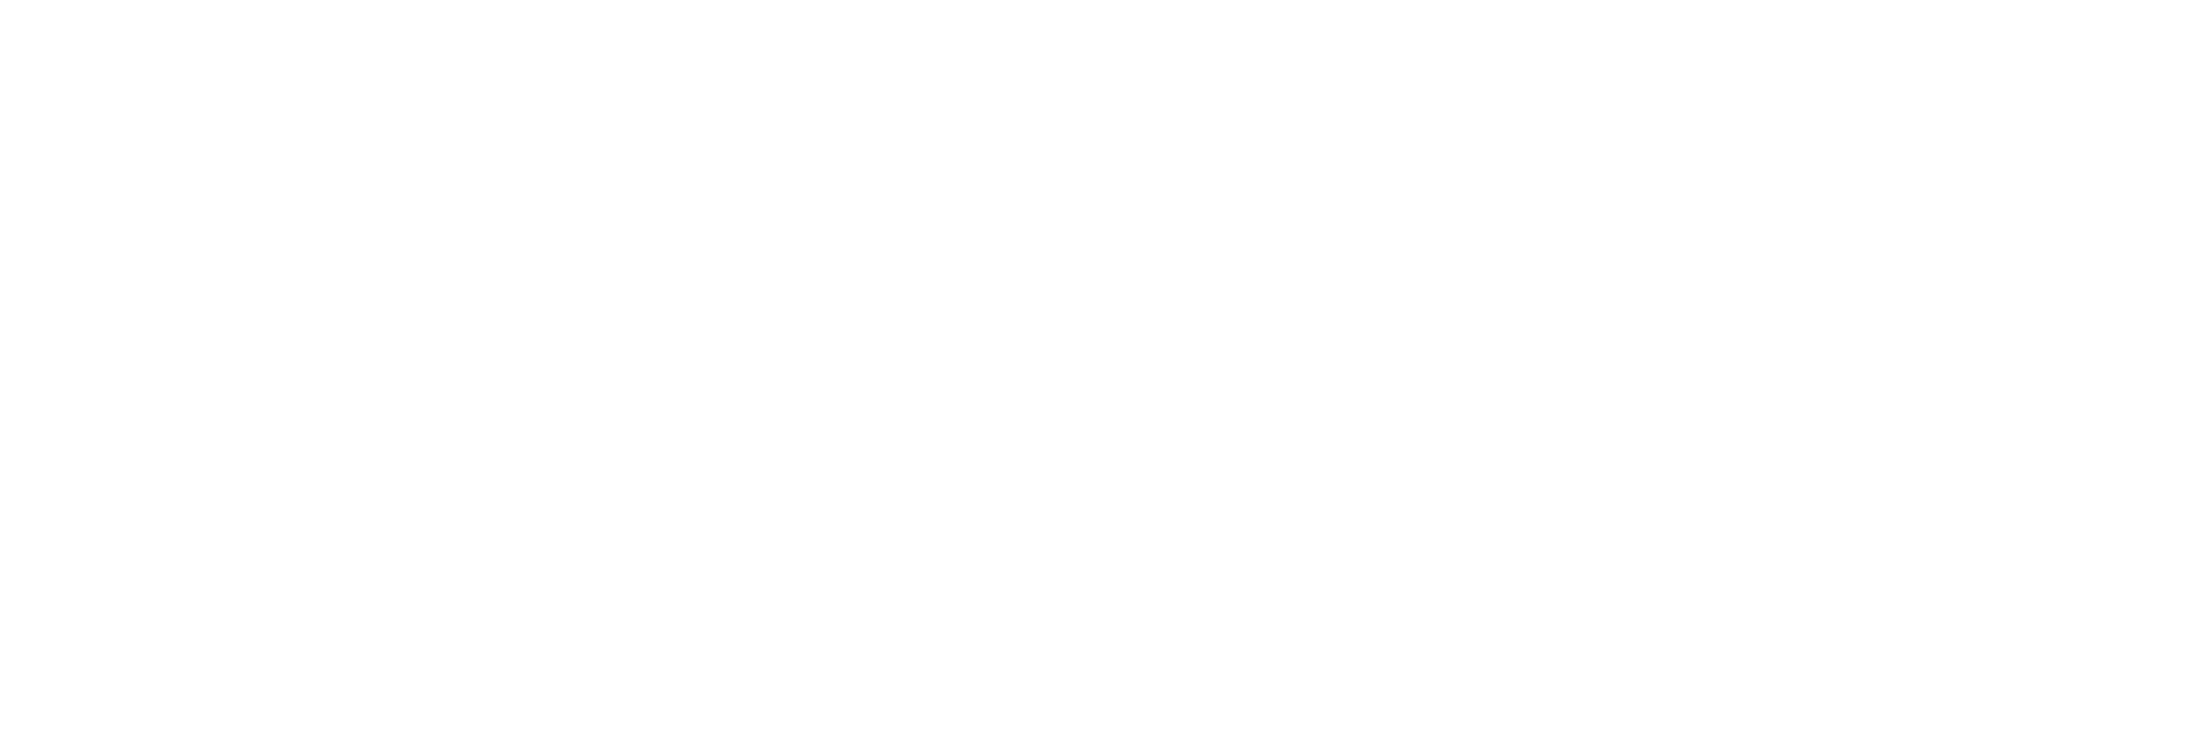

In [485]:
tess = tr.tessreduce(tpf='../../../../data/tess/2020fqv.fits',calibrate=False,corr_correction=)#ra=ra,dec=dec,size=90)#,sector=sector)

In [3]:
from skimage.util.shape import view_as_windows
def downSample2d(arr,sf):
    #isf2 = 1.0/(sf*sf) # Removed this factor since we don't want scaling
    (A,B) = arr.shape
    windows = view_as_windows(arr, (sf,sf), step = sf)
    return windows.sum(3).sum(2)#*isf2



In [ ]:
def regional_stats_mask(image,size=90,sigma=3,iters=10):
    if size < 30:
        print('!!! Region size is small !!!')
    sx, sy = image.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    regions = sy//size * (X//size) + Y//size
    max_reg = np.max(regions)

    clip = np.zeros_like(image)
    for i in range(max_reg+1):
        rx,ry = np.where(regions == i)
        m,me, s = sigma_clipped_stats(image[ry,rx],maxiters=iters)
        cut_ind = np.where((image[rx,ry] >= me+sigma*s) | (image[rx,ry] <= me-sigma*s))
        clip[rx[cut_ind],ry[cut_ind]] = 1
    return clip

In [4]:
downSample2d(tess.ref,90)

array([[342220.93233425]])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
%matplotlib inline

In [507]:
ar = tess.ref
fact = 40
sx, sy = ar.shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//fact * (X//fact) + Y//fact

In [508]:
ind = 6
rx,ry = np.where(regions == ind)

<IPython.core.display.Javascript object>


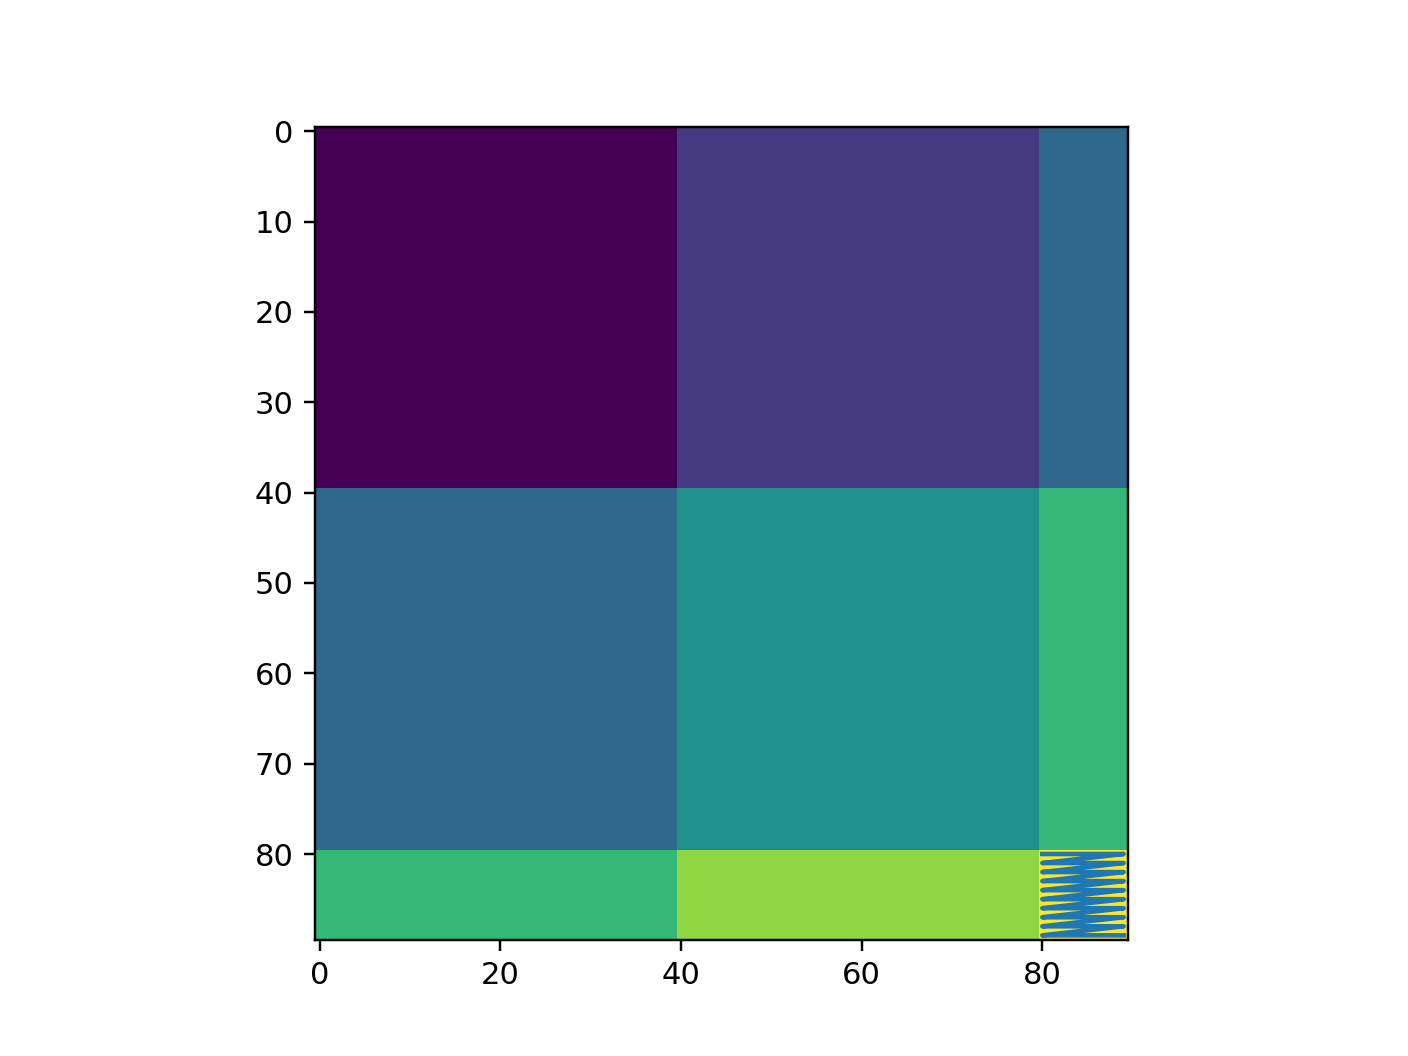

In [509]:
plt.figure()
plt.imshow(regions)
plt.plot(ry,rx)

In [64]:
max_reg

8

In [35]:
image = tess.ref



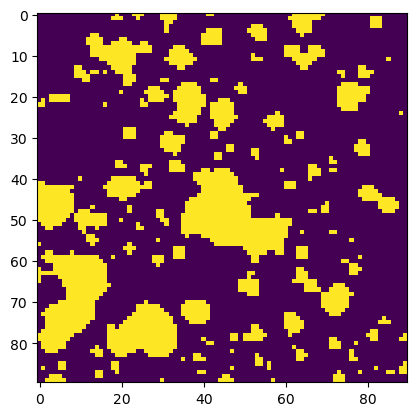

In [36]:
plt.figure()
plt.imshow(regional_stats_mask(tess.ref,90))

In [231]:
flux = tess.bkg
size = 90
sx, sy = flux[0].shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//size * (X//size) + Y//size
max_reg = np.max(regions)

clip = np.zeros_like(flux)
for i in range(max_reg+1):
    rx,ry = np.where(regions == i)
    m,me, s = sigma_clipped_stats(flux[:,ry,rx],maxiters=10,axis=(1))
    cut_ind = np.where((flux[:,rx,ry] >= (me+2*s)[:,np.newaxis]) | 
                       (flux[:,rx,ry] <= (me-2*s)[:,np.newaxis]))
    clip[cut_ind[0],rx[cut_ind[1]],ry[cut_ind[1]]] = 1


<IPython.core.display.Javascript object>


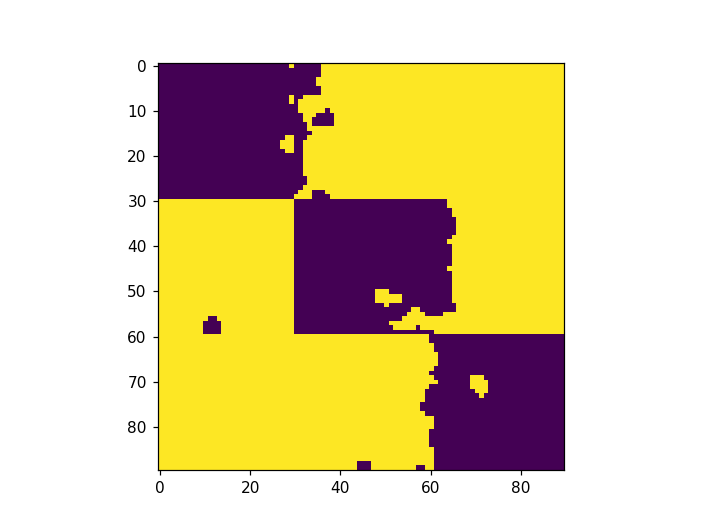

<IPython.core.display.Javascript object>


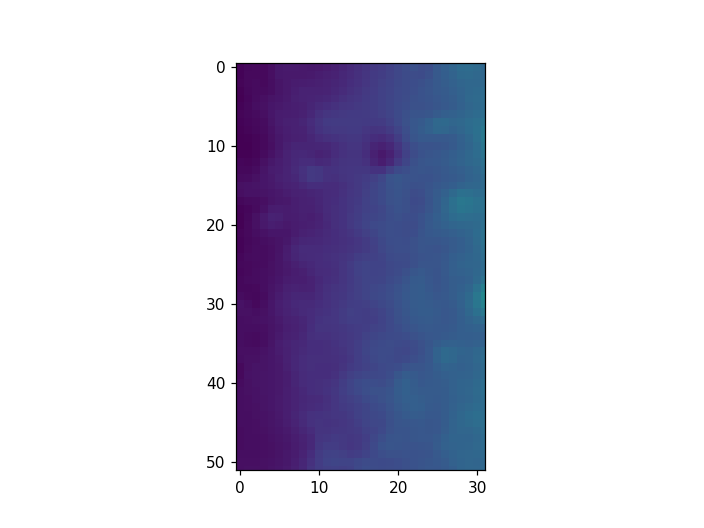

In [105]:
i = 200
plt.figure()
plt.imshow(clip[i])

plt.figure()
plt.imshow(flux[i])

In [84]:
%matplotlib inline 

In [89]:
def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [218]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [220]:
X.reshape(-1,1).shape

(2025, 1)

made reference
made source mask
calculating background
background subtracted
Aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction


<IPython.core.display.Javascript object>


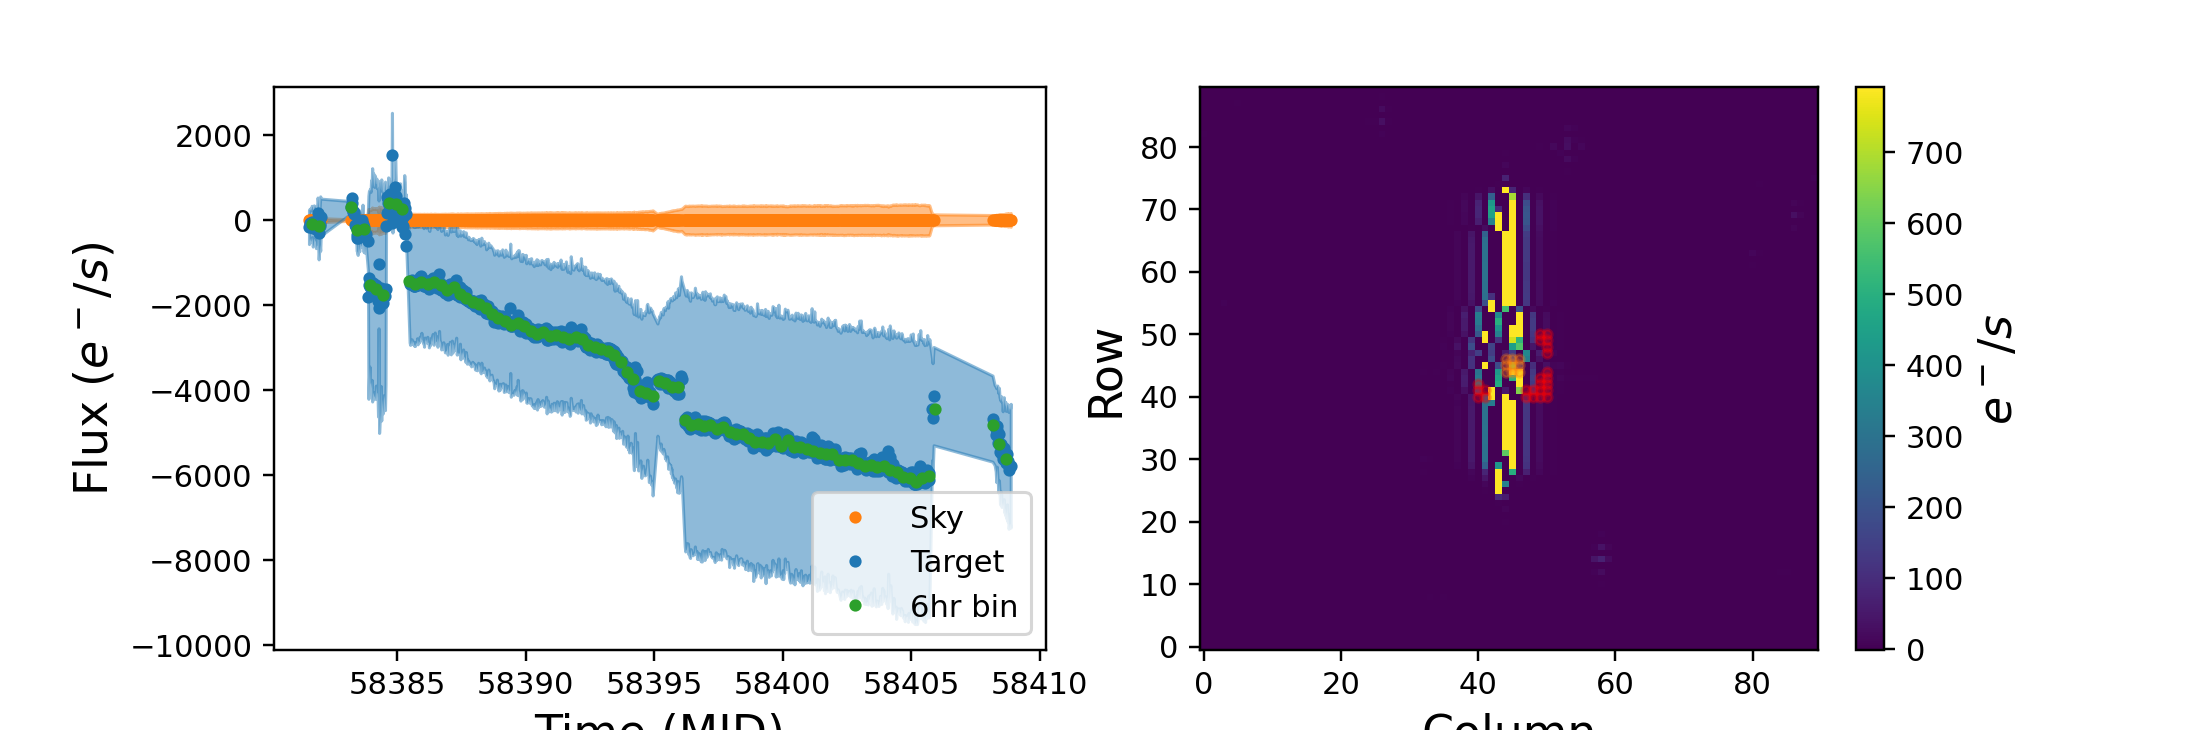

In [506]:
path = '/Users/rri38/Documents/work/code/tess/strange_things/alpha_star/tess-s0003-1-2_26.017013_-15.937480_90x90_astrocut.fits'
#path = '/Users/rri38/Documents/work/code/tess/strange_things/alpha_star/'
tess = tr.tessreduce(tpf=path,calibrate=False)#ra=ra,dec=dec,size=90)#,sector=sector)

!!! WARNING no MJD time specified, using default of 59000
|   Sector |   Camera |   CCD | Covers   |   Time difference  |
|          |          |       |          |             (days) |
|----------+----------+-------+----------+--------------------|
|       21 |        1 |     3 | False    |               -103 |
|       44 |        4 |     4 | False    |                499 |
|       46 |        1 |     2 | False    |                550 |
|       72 |        2 |     2 | False    |               1259 |
getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
Aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction


<IPython.core.display.Javascript object>


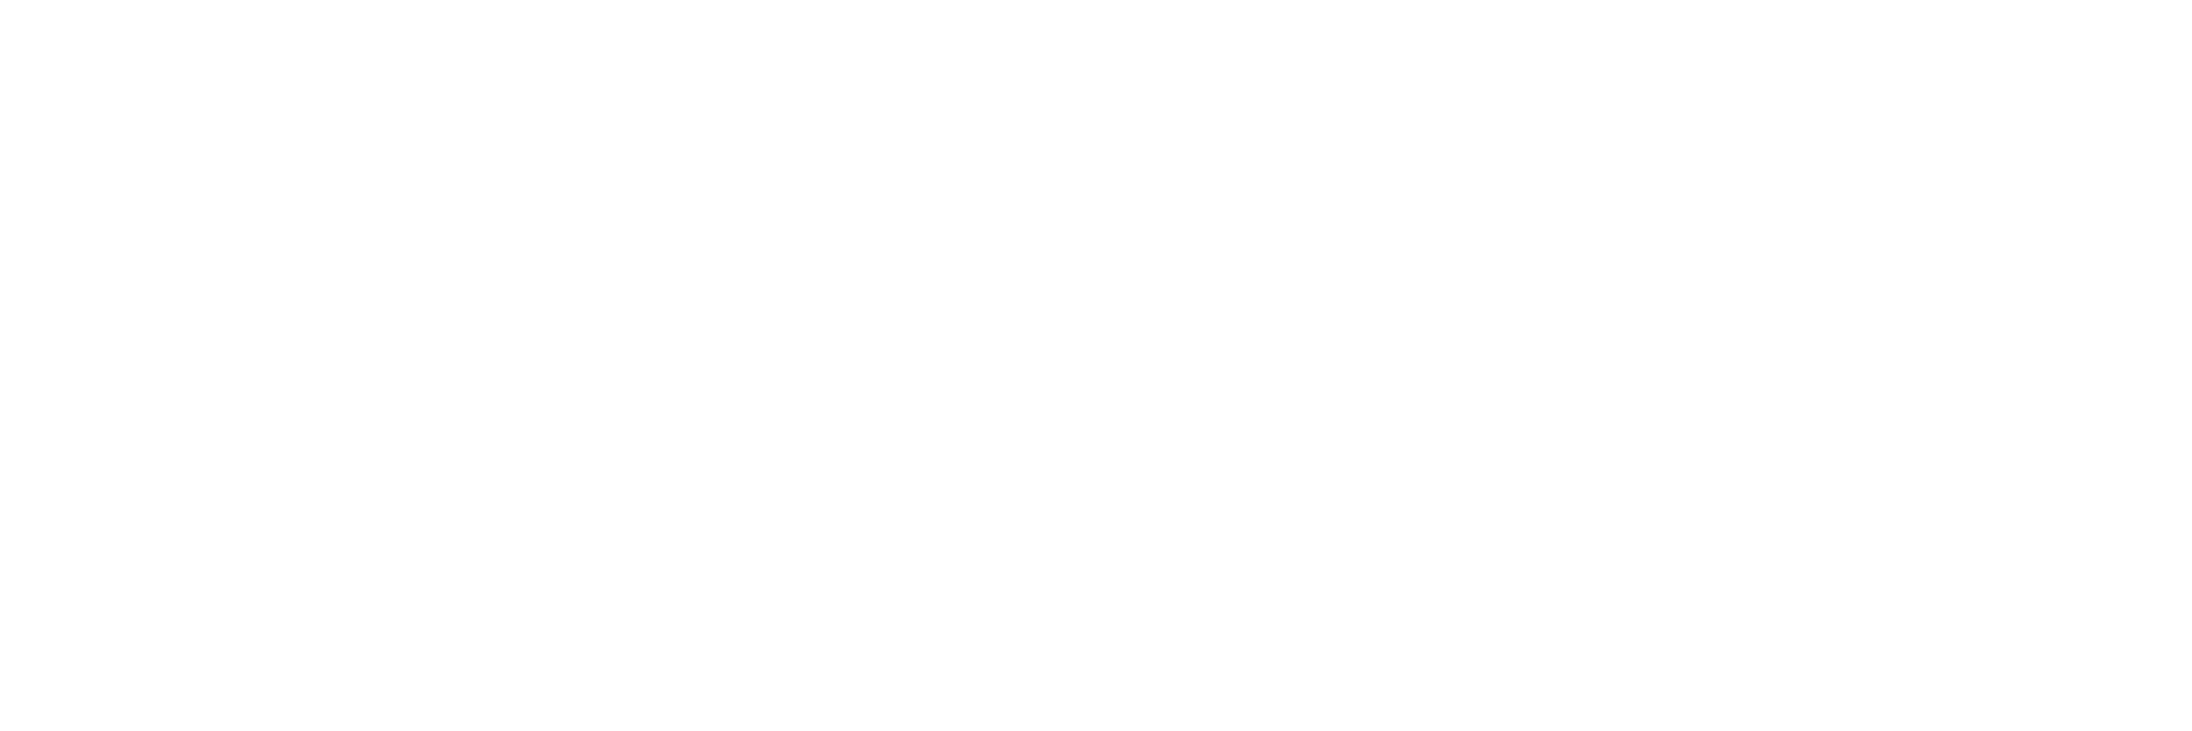

In [443]:
obs = tr.spacetime_lookup('08:52:35.241','+28:19:47.34')
tess = tr.tessreduce(obs_list=obs[1],calibrate=False)


In [404]:
# https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6
cut = tess.bkg[1000]
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
zz = cut.reshape(-1,1)
order = 4
model = make_pipeline(
        PolynomialFeatures(degree=order),
        LinearRegression(fit_intercept=False))
model.fit(np.c_[xx, yy], zz)

def names2model(names):
    # C[i] * X^n * Y^m
    return ' + '.join([
        f"C[{i}]*{n.replace(' ','*')}"
        for i,n in enumerate(names)])

m = names2model(model[0].get_feature_names_out(['X', 'Y']))
C = model[1].coef_.T  # coefficients
r2 = model.score(np.c_[xx, yy], zz)  # R-squared
ZZ = model.predict(np.c_[x.flatten(), y.flatten()]).reshape(x.shape)

<IPython.core.display.Javascript object>


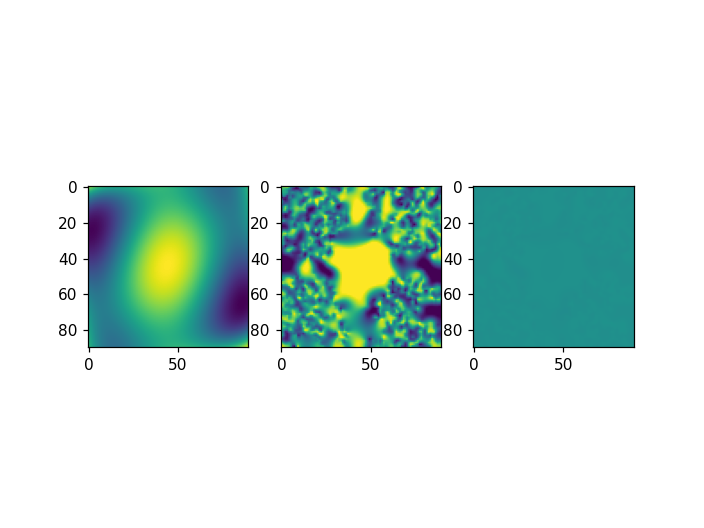

In [405]:
plt.figure()
plt.subplot(131)
plt.imshow(ZZ)#,vmin=100,vmax=120)
plt.subplot(132)
plt.imshow(cut)#,vmin=100,vmax=120)
plt.subplot(133)
plt.imshow(cut-ZZ,vmin=-10,vmax=10)

<IPython.core.display.Javascript object>


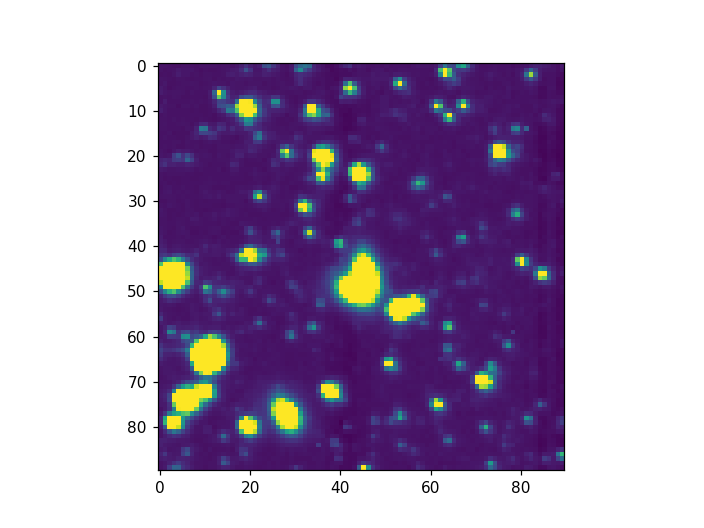

In [339]:
plt.figure()
plt.imshow(tess.ref,vmax=100)

array([[ 1.,  1.,  1., ..., nan, nan,  1.],
       [ 1.,  1.,  1., ..., nan, nan,  1.],
       [ 1.,  1.,  1., ..., nan, nan,  1.],
       ...,
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1., nan, ...,  1.,  1.,  1.]])

<IPython.core.display.Javascript object>


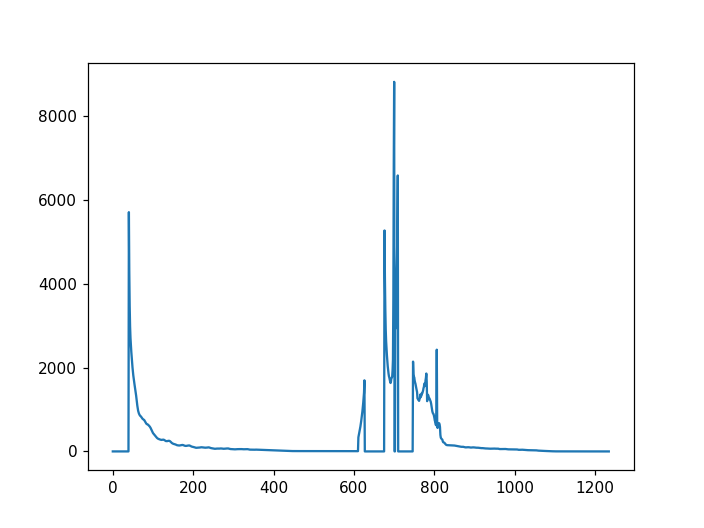

In [488]:
plt.figure()
plt.plot(tess.bkg[:,10,10])

In [504]:
sm = tess._bkgmask
x, y = np.meshgrid(np.arange(0,size), np.arange(0,size))
# https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6
i = 100
cut = tess.bkg[i]
masked = cut * sm[i]
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
zz = cut.reshape(-1,1)
ind = np.where(np.isfinite(zz))
order = 4
model = make_pipeline(
        PolynomialFeatures(degree=order),
        LinearRegression(fit_intercept=False))
model.fit(np.c_[xx[ind], yy[ind]], zz[ind])

def names2model(names):
    # C[i] * X^n * Y^m
    return ' + '.join([
        f"C[{i}]*{n.replace(' ','*')}"
        for i,n in enumerate(names)])

m = names2model(model[0].get_feature_names_out(['X', 'Y']))
C = model[1].coef_.T  # coefficients
r2 = model.score(np.c_[xx, yy], zz)  # R-squared
ZZ = model.predict(np.c_[x.flatten(), y.flatten()]).reshape(x.shape)

diff = cut - ZZ
m,me, s = sigma_clipped_stats(diff,maxiters=10)
cut_ind = np.where((diff >= (me+2*s)) | 
                   (diff <= (me-2*s)))

bkg2 = tr.deepcopy(cut)
bkg2[cut_ind] = ZZ[cut_ind]
#bkg2 = ZZ

<IPython.core.display.Javascript object>


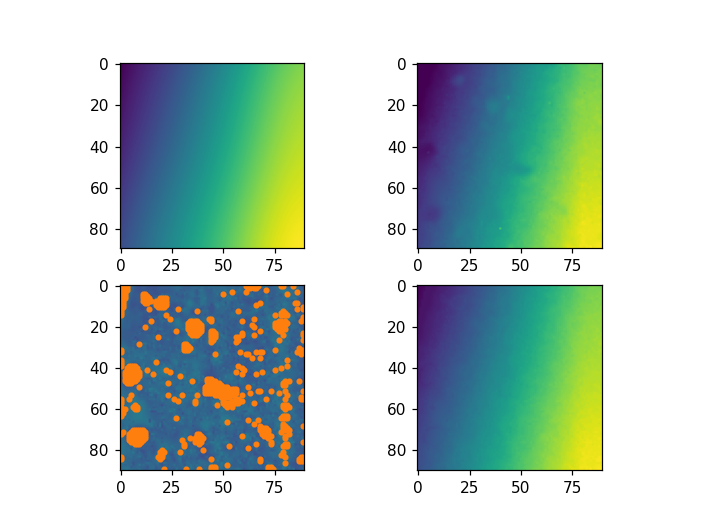

<IPython.core.display.Javascript object>


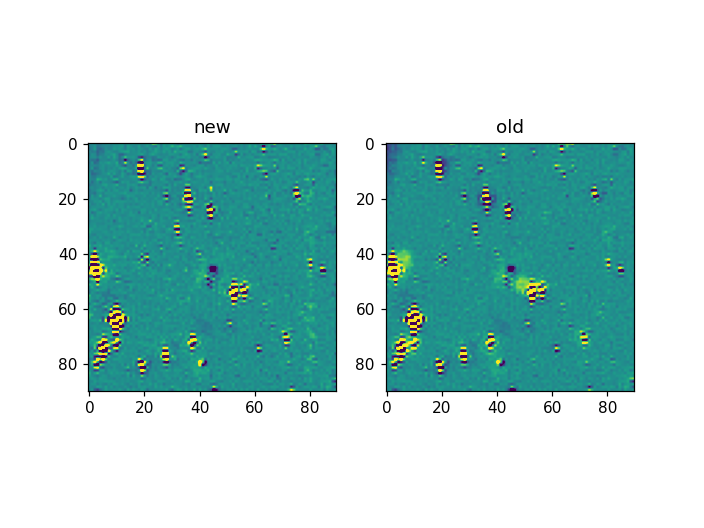

In [505]:
plt.figure()
plt.subplot(221)
plt.imshow(ZZ)#,vmin=100,vmax=120)
plt.subplot(222)
plt.imshow(cut)#,vmin=100,vmax=120)
plt.subplot(223)
plt.imshow(cut-ZZ)#,vmin=-10,vmax=10)
plt.plot(cut_ind[1],cut_ind[0],'C1.')
plt.subplot(224)
plt.imshow(bkg2)
#plt.plot(cut_ind[1],cut_ind[0],'C1.')

plt.figure()
plt.subplot(121)
plt.title('new')
plt.imshow(tess.flux[i]+tess.bkg[i]-bkg2,vmin=-10,vmax=10)
plt.subplot(122)
plt.title('old')
plt.imshow(tess.flux[i],vmin=-10,vmax=10)

In [235]:
flux = tess.bkg[1000]
size = 90
sx, sy = flux.shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//size * (X//size) + Y//size
max_reg = np.max(regions)

clip = np.zeros_like(flux)
for i in range(max_reg+1):
    rx,ry = np.where(regions == i)
    cut = flux[ry,rx].reshape(size,size)
    x, y = np.meshgrid(np.arange(0,size), np.arange(0,size))
    parameters, covariance = curve_fit(function, [y.ravel(),x.ravel()], cut.ravel())
    z = function(np.array([y, x]), *parameters)
    diff = (cut-z)#.ravel()
    m,me, s = sigma_clipped_stats(diff,maxiters=5)
    cut_ind = np.where((diff >= (me+2*s)) | 
                       (diff <= (me-2*s)))
    #clip[rx[cut_ind[0]],ry[cut_ind[0]]] = 1


<IPython.core.display.Javascript object>


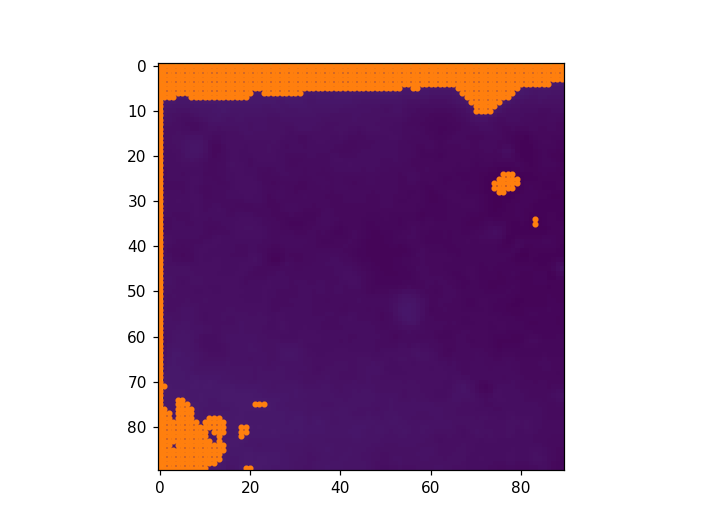

In [236]:
plt.figure()
plt.imshow(diff.reshape(size,size))
plt.plot(cut_ind[1],cut_ind[0],'C1.')

<IPython.core.display.Javascript object>


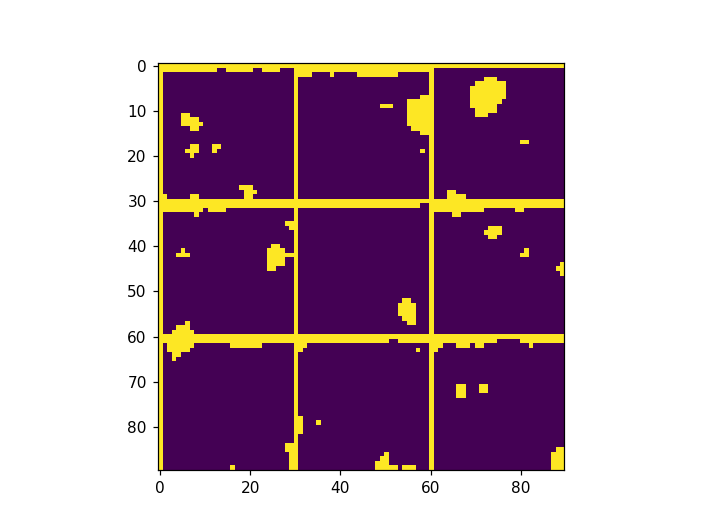

In [194]:
plt.figure()
plt.imshow(clip)

In [181]:
test = flux[ry,rx].reshape(size,size)
X, Y = np.meshgrid(np.arange(0,30), np.arange(0,30))
Z = test.ravel()

In [179]:
test = tess.bkg
X, Y = np.meshgrid(np.arange(0,90), np.arange(0,90))
Z = test[100].ravel()

In [154]:
np.where(~np.isfinite(Z))

(array([], dtype=int64),)

In [183]:
parameters, covariance = curve_fit(function, [Y.ravel(),X.ravel()], Z)

In [184]:
z = function(np.array([Y+1, X+1]), *parameters)

<IPython.core.display.Javascript object>


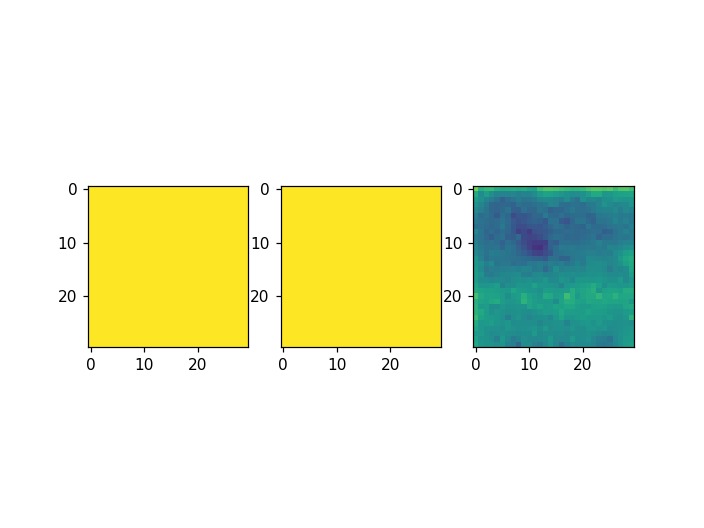

In [186]:
plt.figure()
plt.subplot(131)
plt.imshow(z,vmin=100,vmax=120)
plt.subplot(132)
plt.imshow(test,vmin=100,vmax=120)
plt.subplot(133)
plt.imshow(test-z,vmin=-10,vmax=10)

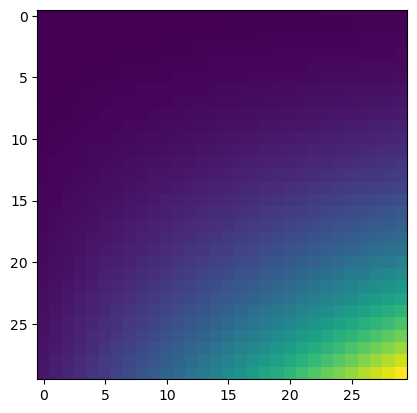

<Figure size 640x480 with 0 Axes>

In [87]:
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# test function
def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

# setup test data
raw_data = [2.0, 2.0, 2.0], [1.5, 1.5, 1.5], [0.5, 0.5, 0.5],[3.0, 2.0, 1.0], [3.0, 2.0, 1.0],\
       [3.0, 2.0, 1.0], [2.4, 2.5, 2.2], [2.4, 3.0, 2.5], [4.0, 3.3, 8.0]

# convert data into proper format
x_data = []
y_data = []
z_data = []
for item in raw_data:
    x_data.append(item[0])
    y_data.append(item[1])
    z_data.append(item[2])

# get fit parameters from scipy curve fit

parameters, covariance = curve_fit(function, [np.arange(0,90), y_data], z_data)

# create surface function model
# setup data points for calculating surface model
model_x_data = np.linspace(min(x_data), max(x_data), 30)
model_y_data = np.linspace(min(y_data), max(y_data), 30)
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array
Z = function(np.array([X, Y]), *parameters)
plt.figure()
plt.imshow(Z)
# setup figure object
fig = plt.figure()
# setup 3d object
ax = Axes3D(fig)
# plot surface
ax.plot_surface(X, Y, Z)
# plot input data
ax.scatter(x_data, y_data, z_data, color='red')
# set plot descriptions
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_zlabel('Z data')
plt.show()

In [45]:
cut_ind = np.where((flux[:,rx,ry] >= (me+2*s)[:,np.newaxis]) | (flux[:,rx,ry] <= (me-2*s)[:,np.newaxis]))



In [47]:
cut_ind

(array([  40,   40,   40, ..., 1234, 1234, 1234]),
 array([   3,   23,   24, ..., 2000, 2011, 2024]))

In [40]:
tess.flux[:,ry,rx].shape

(1235, 2025)

In [41]:
m,me, s = sigma_clipped_stats(tess.flux[:,ry,rx],maxiters=10,axis=(1))

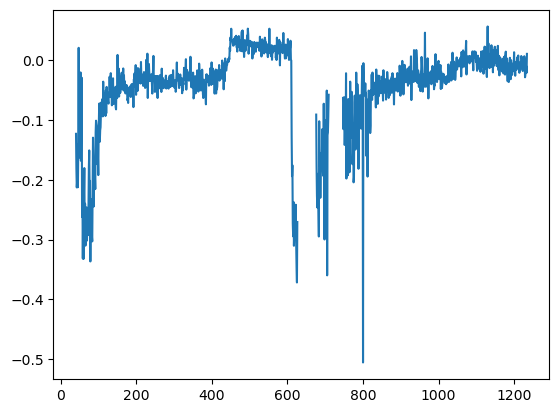

In [43]:
plt.figure()
plt.plot(m)

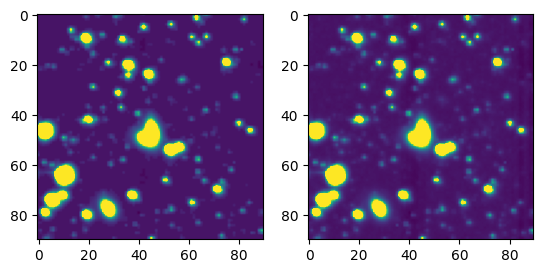

In [93]:
plt.figure()
plt.subplot(121)
plt.imshow(clip*ar,vmax=100)
plt.subplot(122)
plt.imshow(ar,vmax=100)

In [94]:
clip*ar

array([[ 0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.        ,  4.06870778,  0.        , ...,  0.        ,
        16.20273147, 32.08021452],
       [ 0.        ,  0.        ,  4.16297699, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 13.53647493, ...,  0.        ,
        -0.        , -0.        ]])